In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from sklearn.preprocessing import robust_scale
from sklearn.decomposition import PCA

Read data

In [2]:
ThailandMap = gpd.read_file("../../../Data/Enriched/ThailandMapProvinceIdRegion/ThailandMapProvinceIdRegion.shp")
ThailandMap = ThailandMap.rename(columns={'RegionInTh':'RegionInThai'})

ThailandMap['Region'] = ThailandMap['Region'].replace(
    {
        'NorthernThailand': 'Northern Thailand'
        , 'SouthernThailand': 'Southern Thailand'
        , 'WesternThailand': 'Western Thailand'
        , 'EasternThailand': 'Eastern Thailand'
        , 'NortheastThailand': 'Northeast Thailand'
        , 'CentralThailand': 'Central Thailand'
    }
)

ThailandMap = ThailandMap.sort_values('ProvinceId').reset_index(drop=True)

ThailandMapWithoutBkk = ThailandMap[ThailandMap['Name']!='Bangkok'].reset_index(drop=True)
ThailandMap = pd.concat([ThailandMapWithoutBkk, ThailandMap[ThailandMap['Name']=='Bangkok']]).reset_index(drop=True)

In [3]:
Dat = pd.read_csv("../../../Data/Processed/DataProvince.csv")
Dat = Dat.sort_values('ProvinceId').reset_index(drop=True)

In [4]:
Dat['MonthlyIncomeRatio2020'] = Dat['MonthlyIncomeQuantile80'] / Dat['MonthlyIncomeQuantile20']

Select the variables for the PCA

In [5]:
Variables = [
    'MonthlyIncomeMean'
    , 'MonthlyIncomeGiniIndex'
    , 'MonthlyIncomeRatio2020'
    , 'IndicatorFormalDebtMean'
    , 'YearlySavingsPositiveMean'
    , 'YearsOfEducation'
    , 'Indicator25Mean'
    , 'Indicator23Mean'
    , 'Indicator24Mean'
]

In [6]:
RenameVariables = {
    'MonthlyIncomeMean': "Monthly Income"
    , 'MonthlyIncomeGiniIndex': "Gini Index"
    , 'MonthlyIncomeRatio2020': "Income Ratio 20:20"
    , 'IndicatorFormalDebtMean': "Percent Formal Debt"
    , 'YearlySavingsPositiveMean': "Yearly Savings"
    , 'YearsOfEducation': "Years Of Education"
    , 'Indicator25Mean': "Smoking"
    , 'Indicator23Mean': "Having No Savings"
    , 'Indicator24Mean': "Alcohol Consumption"
}

In [7]:
DatVariables = Dat[Variables]
DatVariables = DatVariables.rename(columns=RenameVariables)

Variables = list(DatVariables.columns)

DatScaled = robust_scale(DatVariables)
DatScaled = pd.DataFrame(DatScaled, columns=DatVariables.columns)

PCA

In [8]:
PcaModel = PCA(n_components=2)
PcaFit = PcaModel.fit(DatScaled)
PcaDat = PcaFit.transform(DatScaled)
PcaDat = pd.DataFrame(PcaDat, columns=['PC1', 'PC2'])

PcaDat['Region'] = ThailandMapWithoutBkk['Region']
PcaDat['Name'] = ThailandMapWithoutBkk['Name']
PcaDat['ProvinceId'] = ThailandMapWithoutBkk['ProvinceId']

In [9]:
PcaLoads = PcaFit.components_
PcaLoads = pd.DataFrame(PcaLoads.T, columns=['PCA1', 'PCA2'])
PcaLoads['Variable'] = Variables
PcaLoads = PcaLoads.set_index('Variable')

In [12]:
PcaLoads.round(2)

,PCA1,PCA2
Variable,,
Monthly Income,0.40,0.33
Gini Index,-0.02,0.61
Income Ratio 20:20,0.09,0.43
Percent Formal Debt,-0.39,0.04
Yearly Savings,0.24,0.13
Years Of Education,0.51,-0.10
Smoking,-0.21,-0.34
Having No Savings,0.34,-0.42
Alcohol Consumption,-0.45,0.11


In [11]:
# PcaDat.to_csv("../../../Data/Processed/DataPcaMyVariables.csv", index=False)

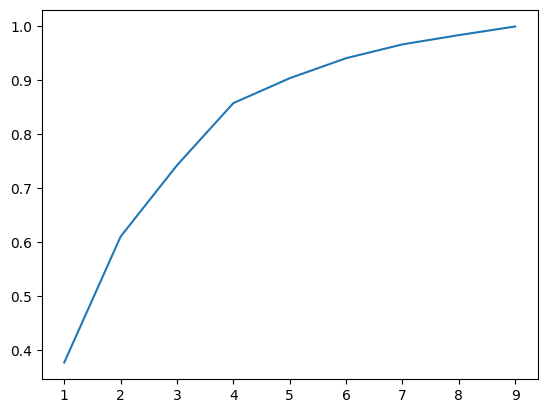

In [14]:
PcaModel = PCA(n_components=len(Variables))
PcaFit = PcaModel.fit(DatScaled)
PcaDat = PcaFit.transform(DatScaled)

plt.plot(range(1, len(Variables)+1), PcaFit.explained_variance_ratio_.cumsum())

In [16]:
PcaFit.explained_variance_ratio_.cumsum().round(2)

array([0.38, 0.61, 0.74, 0.86, 0.9 , 0.94, 0.97, 0.98, 1.  ])